# Proyek Analisis Data: Air Quality
- Nama: Ahmad Naufal Hilmy
- Email: hilmyahmadnaufal@gmail.com
- Id Dicoding: anhilmy

## Menentukan Pertanyaan Bisnis

- Periode kapan yang memiliki suhu paling tinggi?
- Daerah mana yang memiliki suhu paling tinggi?
- Bagaimana trend kualitas udara per tahun?
- Daerah mana yang memiliki kualitas udara paling buruk?

## Menyiapkan semua library yang dibutuhkan

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

### Column Description:
- PM2.5: PM2.5 concentration (ug/m^3)
- PM10: PM10 concentration (ug/m^3)
- SO2: SO2 concentration (ug/m^3)
- NO2: NO2 concentration (ug/m^3)
- CO: CO concentration (ug/m^3)
- O3: O3 concentration (ug/m^3)
- TEMP: temperature (degree Celsius) 
- PRES: pressure (hPa)
- DEWP: dew point temperature (degree Celsius)
- RAIN: precipitation (mm)
- wd: wind direction
- WSPM: wind speed (m/s)
- station: name of the air-quality monitoring site

In [178]:
aotizhongxin_df = pd.read_csv("data-air/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
aotizhongxin_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [179]:
changping_df = pd.read_csv("data-air/PRSA_Data_Changping_20130301-20170228.csv")
changping_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [180]:
dingling_df = pd.read_csv("data-air/PRSA_Data_Dingling_20130301-20170228.csv")
dongsi_df = pd.read_csv("data-air/PRSA_Data_Dongsi_20130301-20170228.csv")
guanyuan_df = pd.read_csv("data-air/PRSA_Data_Guanyuan_20130301-20170228.csv")
gucheng_df = pd.read_csv("data-air/PRSA_Data_Gucheng_20130301-20170228.csv")
huairou_df = pd.read_csv("data-air/PRSA_Data_Huairou_20130301-20170228.csv")
nongzhanguan_df = pd.read_csv("data-air/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
shunyi_df = pd.read_csv("data-air/PRSA_Data_Shunyi_20130301-20170228.csv")
tiantan_df = pd.read_csv("data-air/PRSA_Data_Tiantan_20130301-20170228.csv")
wanliu_df = pd.read_csv("data-air/PRSA_Data_Wanliu_20130301-20170228.csv")
wanshouxigong_df = pd.read_csv("data-air/PRSA_Data_Wanshouxigong_20130301-20170228.csv")

In [181]:
arr_all_df = [aotizhongxin_df, changping_df, dingling_df, dongsi_df, guanyuan_df, gucheng_df, huairou_df, nongzhanguan_df, shunyi_df, tiantan_df, wanliu_df, wanshouxigong_df]

In [182]:
all_df = pd.concat([aotizhongxin_df, changping_df, dingling_df, dongsi_df, guanyuan_df, gucheng_df, huairou_df, nongzhanguan_df, shunyi_df, tiantan_df, wanliu_df, wanshouxigong_df])

### Assessing Data

In [183]:
all_df.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [184]:
all_df.duplicated().sum()

0

In [185]:
all_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,418946,420450.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43335,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,NaN,1.729711,NaN
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,NaN,1.246386,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


In [186]:
all_df.isnull()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
35060,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
35061,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
35062,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [187]:
len(all_df["No"])

420768

In [188]:
all_df[all_df['PM10'] == all_df["PM10"].max()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
7887,7888,2014,1,23,15,NaN,999.0,137.0,122.0,3800.0,10.0,3.2,1004.1,-13.2,0.0,SE,1.5,Changping
5819,5820,2013,10,29,11,NaN,999.0,9.0,25.0,700.0,43.0,15.3,1022.8,-3.1,0.0,N,3.7,Guanyuan
18620,18621,2015,4,15,20,88.0,999.0,2.0,13.0,300.0,79.0,18.9,1000.0,-1.0,0.0,NNW,4.3,Shunyi


In [189]:
all_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


### Cleaning Data

In [190]:
for loc_df in arr_all_df:
    loc_df["PM2.5"].interpolate(method="linear", inplace=True)
    loc_df["PM10"].interpolate(method="linear", inplace=True)
    loc_df["SO2"].interpolate(method="linear", inplace=True)
    loc_df["NO2"].interpolate(method="linear", inplace=True)
    loc_df["CO"].interpolate(method="linear", inplace=True)
    loc_df["O3"].interpolate(method="linear", inplace=True)
    loc_df["TEMP"].interpolate(method="linear", inplace=True)
    loc_df["RAIN"].interpolate(method="linear", inplace=True)

In [191]:
clean_df = pd.concat(arr_all_df)

In [192]:
clean_df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5         0
PM10          0
SO2           0
NO2          22
CO            0
O3            0
TEMP          0
PRES        393
DEWP        403
RAIN          0
wd         1822
WSPM        318
station       0
dtype: int64

In [193]:
clean_df.dropna(axis=0, inplace=True)

In [194]:
clean_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [195]:
clean_df['date'] = clean_df['year'].astype(str) + "-" + clean_df['month'].astype(str).str.zfill(2) + "-" + clean_df['day'].astype(str).str.zfill(2)

In [196]:
clean_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01


In [197]:
clean_df['time'] = clean_df['hour'].astype(str) + ":00:00"
clean_df['time'] = clean_df['time'].str.zfill(8)

In [198]:
clean_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date,time
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01,00:00:00
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01,01:00:00
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01,02:00:00
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01,03:00:00
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01,04:00:00


In [199]:
clean_df['datetime'] = pd.to_datetime(clean_df["date"] + " " + clean_df["time"])

In [200]:
# outlier

clean_df = clean_df.filter(["PM2.5", "datetime", "station", "TEMP"], axis=1)

q1_pm = (clean_df['PM2.5']).quantile(0.25)
q3_pm = (clean_df['PM2.5']).quantile(0.75)
iqr_pm = q3_pm - q1_pm

max_pm = q3_pm + (1.5*iqr_pm)
min_pm = q1_pm - (1.5*iqr_pm)

clean_df.drop(clean_df[clean_df["PM2.5"] > max_pm].index, inplace=True)
clean_df.drop(clean_df[clean_df["PM2.5"] < min_pm].index, inplace=True)

## Exploratory Data Analysis (EDA)

### Explore ...

- Daerah mana yang memiliki kualitas udara paling buruk?
- Bagaimana trend kualitas udara per tahun?
- Periode kapan yang memiliki suhu paling tinggi?
- Daerah mana yang memiliki suhu paling tinggi?

In [201]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 377620 entries, 0 to 35063
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   PM2.5     377620 non-null  float64       
 1   TEMP      377620 non-null  float64       
 2   station   377620 non-null  object        
 3   datetime  377620 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 14.4+ MB


In [202]:
explore_df = clean_df

In [203]:
explore_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 377620 entries, 0 to 35063
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   PM2.5     377620 non-null  float64       
 1   TEMP      377620 non-null  float64       
 2   station   377620 non-null  object        
 3   datetime  377620 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 14.4+ MB


In [204]:
explore_df[["station", "PM2.5"]].groupby(by="station").describe()

PM2.5                                                     
                 count       mean        std  min   25%   50%   75%     max
station                                                                    
Aotizhongxin   31524.0  63.654766  51.684087  3.0  20.0  50.0  94.0  247.00
Changping      31485.0  55.691130  48.928608  2.0  16.0  40.0  83.0  247.00
Dingling       31483.0  51.335882  48.722405  3.0  13.0  34.0  77.0  247.00
Dongsi         31527.0  66.196800  54.288736  3.0  20.0  53.0  99.0  247.00
Guanyuan       31524.0  64.052383  50.869548  2.0  21.0  51.0  95.0  247.00
Gucheng        31443.0  65.269619  52.311485  2.0  21.0  52.0  97.0  247.00
Huairou        31351.0  54.071515  47.412389  2.0  16.0  40.0  80.0  247.00
Nongzhanguan   31527.0  64.683480  53.783477  2.0  19.0  51.0  96.0  247.00
Shunyi         31211.0  60.862582  52.020511  2.0  17.0  47.0  91.0  247.25
Tiantan        31527.0  63.260653  51.227090  3.0  20.0  51.0  94.0  247.00
Wanliu         31492.0  64.553471  52.292978  2.0  21.0  51.0  96.0  247.00
Wanshouxigong  31526.0  65.134502  53.122046  3.0  20.0  52.0  97.0  247.00

In [205]:
explore_df[["station", "TEMP"]].groupby(by="station").describe()

TEMP                                                   
                 count       mean        std   min  25%   50%   75%   max
station                                                                  
Aotizhongxin   31524.0  14.335221  11.366967 -16.8  4.1  15.9  23.8  40.5
Changping      31485.0  14.419640  11.344153 -16.6  4.4  15.9  23.9  41.4
Dingling       31483.0  14.420708  11.343721 -16.6  4.4  15.9  23.9  41.4
Dongsi         31527.0  14.443823  11.408959 -16.8  4.2  16.0  24.1  41.1
Guanyuan       31524.0  14.335221  11.366967 -16.8  4.1  15.9  23.8  40.5
Gucheng        31443.0  14.612959  11.252424 -15.6  4.7  16.1  24.0  41.6
Huairou        31351.0  13.192745  11.743339 -19.9  3.1  14.8  22.9  40.3
Nongzhanguan   31527.0  14.443823  11.408959 -16.8  4.2  16.0  24.1  41.1
Shunyi         31211.0  14.178255  11.457120 -16.8  4.0  15.8  23.8  40.6
Tiantan        31527.0  14.443823  11.408959 -16.8  4.2  16.0  24.1  41.1
Wanliu         31492.0  14.165349  11.320175 -15.8  4.2  15.6  23.5  40.5
Wanshouxigong  31526.0  14.546867  11.330933 -16.8  4.4  16.1  24.0  40.6

In [206]:
kapan_df = explore_df.resample(rule="M", on="datetime").agg({
    "PM2.5": ["min", "max", "mean", "std", "median"],
    "TEMP":["min", "max", "mean", "std", "median"],
})

In [207]:
kapan_df.sort_values(by=("PM2.5", "mean"), ascending=False).head()

PM2.5                                      TEMP                   \
             min    max       mean        std median   min   max       mean   
datetime                                                                      
2013-06-30   2.0  246.0  87.587932  57.808857   81.0  13.1  35.7  23.453282   
2014-04-30   3.0  247.0  83.139248  47.130971   77.0   2.7  30.6  16.812095   
2014-07-31   3.0  247.0  80.932508  61.947166   66.0  18.5  37.3  28.096907   
2014-02-28   3.0  245.0  79.729522  60.893098   79.0 -14.5   9.9  -1.276132   
2016-11-30   3.0  247.0  77.745704  60.443871   67.0  -9.0  20.9   4.125896   

                             
                 std median  
datetime                     
2013-06-30  4.308162   22.6  
2014-04-30  5.102765   16.5  
2014-07-31  3.794962   27.9  
2014-02-28  4.097248   -1.4  
2016-11-30  4.745333    4.5

In [208]:
kapan_df.sort_values(by=("TEMP", "mean"), ascending=False).head()

PM2.5                                      TEMP                   \
             min    max       mean        std median   min   max       mean   
datetime                                                                      
2014-07-31   3.0  247.0  80.932508  61.947166   66.0  18.5  37.3  28.096907   
2016-08-31   3.0  191.0  45.839053  33.852528   37.0  14.5  36.2  27.419138   
2016-07-31   3.0  247.0  67.284345  43.323326   61.0  17.8  37.5  27.364174   
2013-07-31   3.0  245.0  65.008254  50.337048   50.0  18.1  38.0  27.149983   
2013-08-31   3.0  244.0  57.740350  44.292270   46.0  12.9  37.7  26.861217   

                             
                 std median  
datetime                     
2014-07-31  3.794962   27.9  
2016-08-31  3.899082   27.6  
2016-07-31  3.824842   27.0  
2013-07-31  3.917533   26.3  
2013-08-31  4.153845   26.4

In [209]:
explore_df.to_csv("clean_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1:
- Daerah mana yang memiliki kualitas udara paling buruk?

In [210]:
visual_df = explore_df
a_df = visual_df.groupby("station").resample(rule="Y", on="datetime").agg({
    "PM2.5": ["mean"]
})
a_df = a_df.swaplevel(0,1, axis=0).sort_index(level=0, axis="rows").reset_index()
a_df['datetime'] = a_df['datetime'].dt.year
a_df["mean"] = a_df[("PM2.5", "mean")]
a_df.drop(columns=("PM2.5", "mean"), inplace=True)
a_df.reset_index(inplace=True)

/home/anhilmy/project/others/dicoding-submission-data-analysis/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anhilmy/project/others/dicoding-submission-data-analysis/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anhilmy/project/others/dicoding-submission-data-analysis/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anhilmy/project/others/dicoding-submission-data-analysis/.env/li

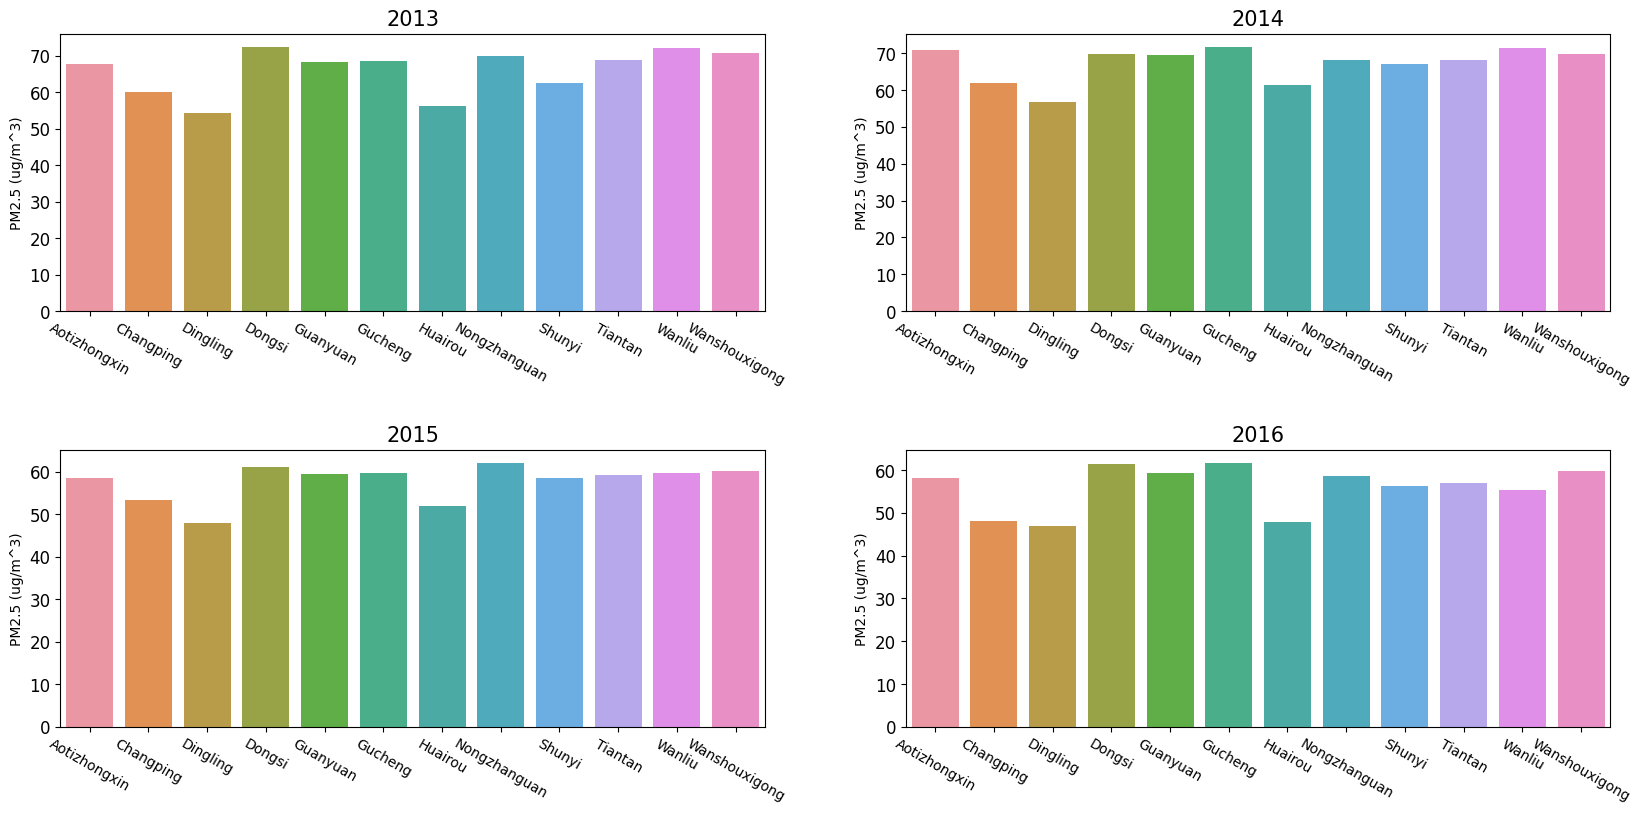

In [211]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 9))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
# print(a_df[a_df["datetime"] == 2013])

sns.barplot(x="station", y="mean", data=(a_df[a_df["datetime"] == 2013]), ax=ax[0][0])
ax[0][0].xaxis.set_tick_params(rotation=-30)
ax[0][0].set_ylabel("PM2.5 (ug/m^3)")
ax[0][0].set_xlabel(None)
ax[0][0].set_title("2013", loc="center", fontsize=15)
ax[0][0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="station", y="mean", data=(a_df[a_df["datetime"] == 2014]), ax=ax[0][1])
ax[0][1].xaxis.set_tick_params(rotation=-30)
ax[0][1].set_ylabel("PM2.5 (ug/m^3)")
ax[0][1].set_xlabel(None)
ax[0][1].set_title("2014", loc="center", fontsize=15)
ax[0][1].tick_params(axis ='y', labelsize=12)

sns.barplot(x="station", y="mean", data=(a_df[a_df["datetime"] == 2015]), ax=ax[1][0])
ax[1][0].xaxis.set_tick_params(rotation=-30)
ax[1][0].set_ylabel("PM2.5 (ug/m^3)")
ax[1][0].set_xlabel(None)
ax[1][0].set_title("2015", loc="center", fontsize=15)
ax[1][0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="station", y="mean", data=(a_df[a_df["datetime"] == 2016]), ax=ax[1][1])
ax[1][1].xaxis.set_tick_params(rotation=-30)
ax[1][1].set_ylabel("PM2.5 (ug/m^3)")
ax[1][1].set_xlabel(None)
ax[1][1].set_title("2016", loc="center", fontsize=15)
ax[1][1].tick_params(axis ='y', labelsize=12)


### Pertanyaan 2:
- Bagaimana trend kualitas udara per tahun?

/home/anhilmy/project/others/dicoding-submission-data-analysis/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anhilmy/project/others/dicoding-submission-data-analysis/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anhilmy/project/others/dicoding-submission-data-analysis/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anhilmy/project/others/dicoding-submission-data-analysis/.env/li

<Axes: title={'center': 'Trend Kualitas udara per tahun'}, xlabel='datetime', ylabel='PM2.5 (ug/m^3)'>

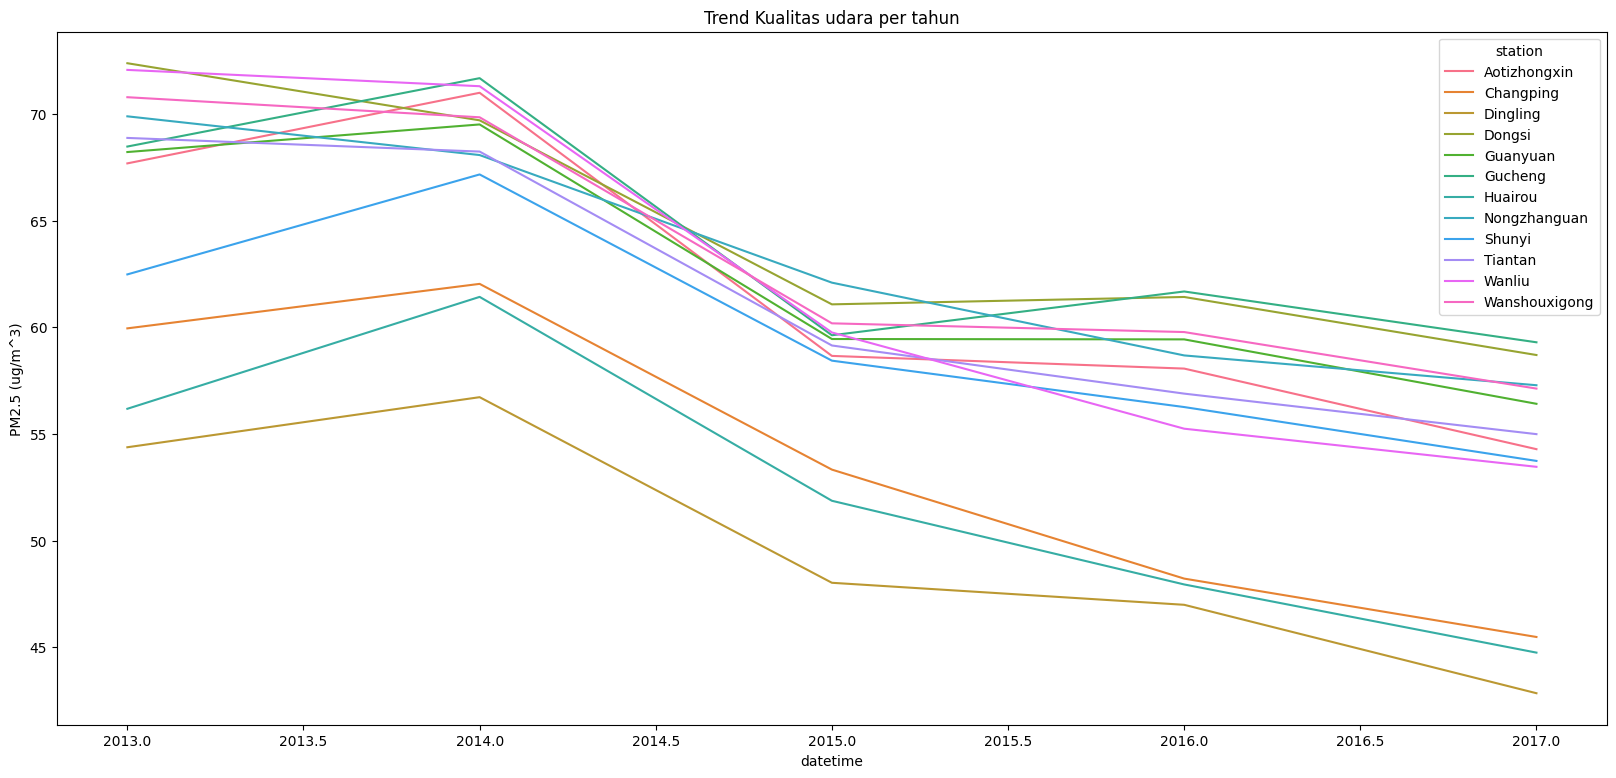

In [212]:
#draw
fig, ax = plt.subplots(figsize=(20, 9))
ax.set_ylabel("PM2.5 (ug/m^3)")
ax.set_title("Trend Kualitas udara per tahun")
sns.lineplot(x="datetime", y='mean', hue="station",  data=a_df)

### Pertanyaan 3:
- Daerah mana yang memiliki suhu paling tinggi?

In [213]:
visual_df = explore_df
b_df = visual_df.drop(visual_df[visual_df["datetime"] > '2017-01-01'].index)
b_df = b_df.groupby("station").resample(rule="Y", on="datetime").agg({
    "TEMP": ["mean"]
})
b_df = b_df.swaplevel(0,1, axis=0).sort_index(level=0, axis="rows").reset_index()
b_df['datetime'] = b_df['datetime'].dt.year
b_df["mean"] = b_df[("TEMP", "mean")]
b_df.drop(columns=("TEMP", "mean"), inplace=True)
b_df.reset_index(inplace=True)

       PM2.5  TEMP        station            datetime
0        4.0  -0.7   Aotizhongxin 2013-03-01 00:00:00
1        8.0  -1.1   Aotizhongxin 2013-03-01 01:00:00
2        7.0  -1.1   Aotizhongxin 2013-03-01 02:00:00
3        6.0  -1.4   Aotizhongxin 2013-03-01 03:00:00
4        3.0  -2.0   Aotizhongxin 2013-03-01 04:00:00
...      ...   ...            ...                 ...
33607  148.0  -7.3  Wanshouxigong 2016-12-30 07:00:00
33608  173.0  -6.5  Wanshouxigong 2016-12-30 08:00:00
33609  164.0  -5.4  Wanshouxigong 2016-12-30 09:00:00
33613  213.0  -0.1  Wanshouxigong 2016-12-30 13:00:00
33614  222.0   0.5  Wanshouxigong 2016-12-30 14:00:00

[363953 rows x 4 columns]


/home/anhilmy/project/others/dicoding-submission-data-analysis/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anhilmy/project/others/dicoding-submission-data-analysis/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anhilmy/project/others/dicoding-submission-data-analysis/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anhilmy/project/others/dicoding-submission-data-analysis/.env/li

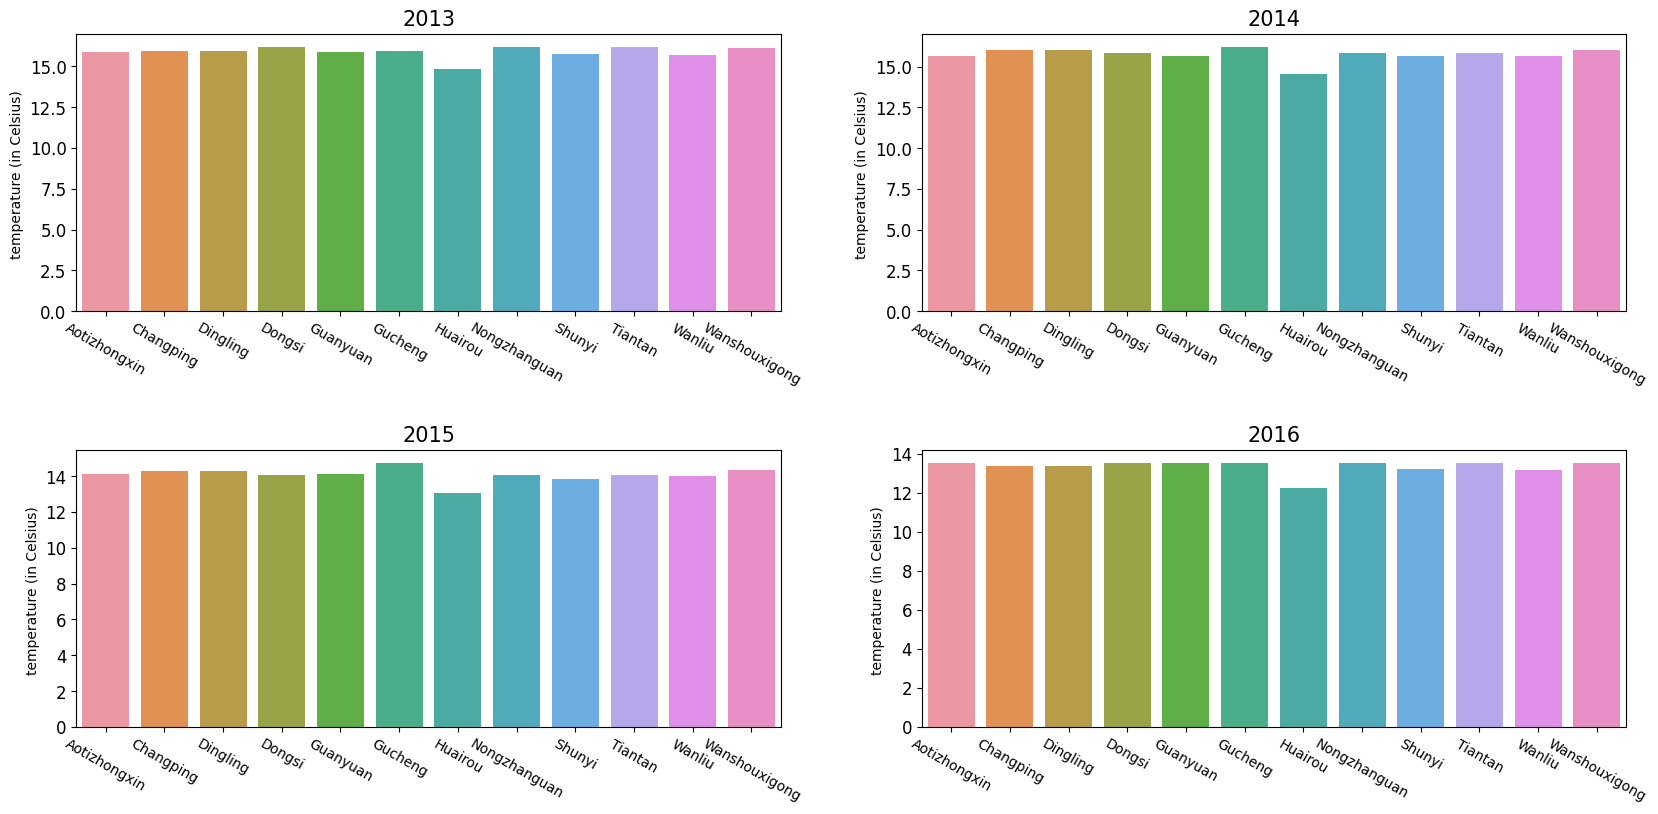

In [214]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 9))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
# print(a_df[a_df["datetime"] == 2013])

sns.barplot(x="station", y="mean", data=(b_df[b_df["datetime"] == 2013]), ax=ax[0][0])
ax[0][0].xaxis.set_tick_params(rotation=-30)
ax[0][0].set_ylabel("temperature (in Celsius) ")
ax[0][0].set_xlabel(None)
ax[0][0].set_title("2013", loc="center", fontsize=15)
ax[0][0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="station", y="mean", data=(b_df[b_df["datetime"] == 2014]), ax=ax[0][1])
ax[0][1].xaxis.set_tick_params(rotation=-30)
ax[0][1].set_ylabel("temperature (in Celsius) ")
ax[0][1].set_xlabel(None)
ax[0][1].set_title("2014", loc="center", fontsize=15)
ax[0][1].tick_params(axis ='y', labelsize=12)

sns.barplot(x="station", y="mean", data=(b_df[b_df["datetime"] == 2015]), ax=ax[1][0])
ax[1][0].xaxis.set_tick_params(rotation=-30)
ax[1][0].set_ylabel("temperature (in Celsius) ")
ax[1][0].set_xlabel(None)
ax[1][0].set_title("2015", loc="center", fontsize=15)
ax[1][0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="station", y="mean", data=(b_df[b_df["datetime"] == 2016]), ax=ax[1][1])
ax[1][1].xaxis.set_tick_params(rotation=-30)
ax[1][1].set_ylabel("temperature (in Celsius) ")
ax[1][1].set_xlabel(None)
ax[1][1].set_title("2016", loc="center", fontsize=15)
ax[1][1].tick_params(axis ='y', labelsize=12)

### Pertanyaan 4:
- Periode kapan yang memiliki suhu paling tinggi?

/home/anhilmy/project/others/dicoding-submission-data-analysis/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anhilmy/project/others/dicoding-submission-data-analysis/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anhilmy/project/others/dicoding-submission-data-analysis/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anhilmy/project/others/dicoding-submission-data-analysis/.env/li

<Axes: title={'center': 'Trend suhu per tahun'}, xlabel='datetime', ylabel='temperature (in Celsius) '>

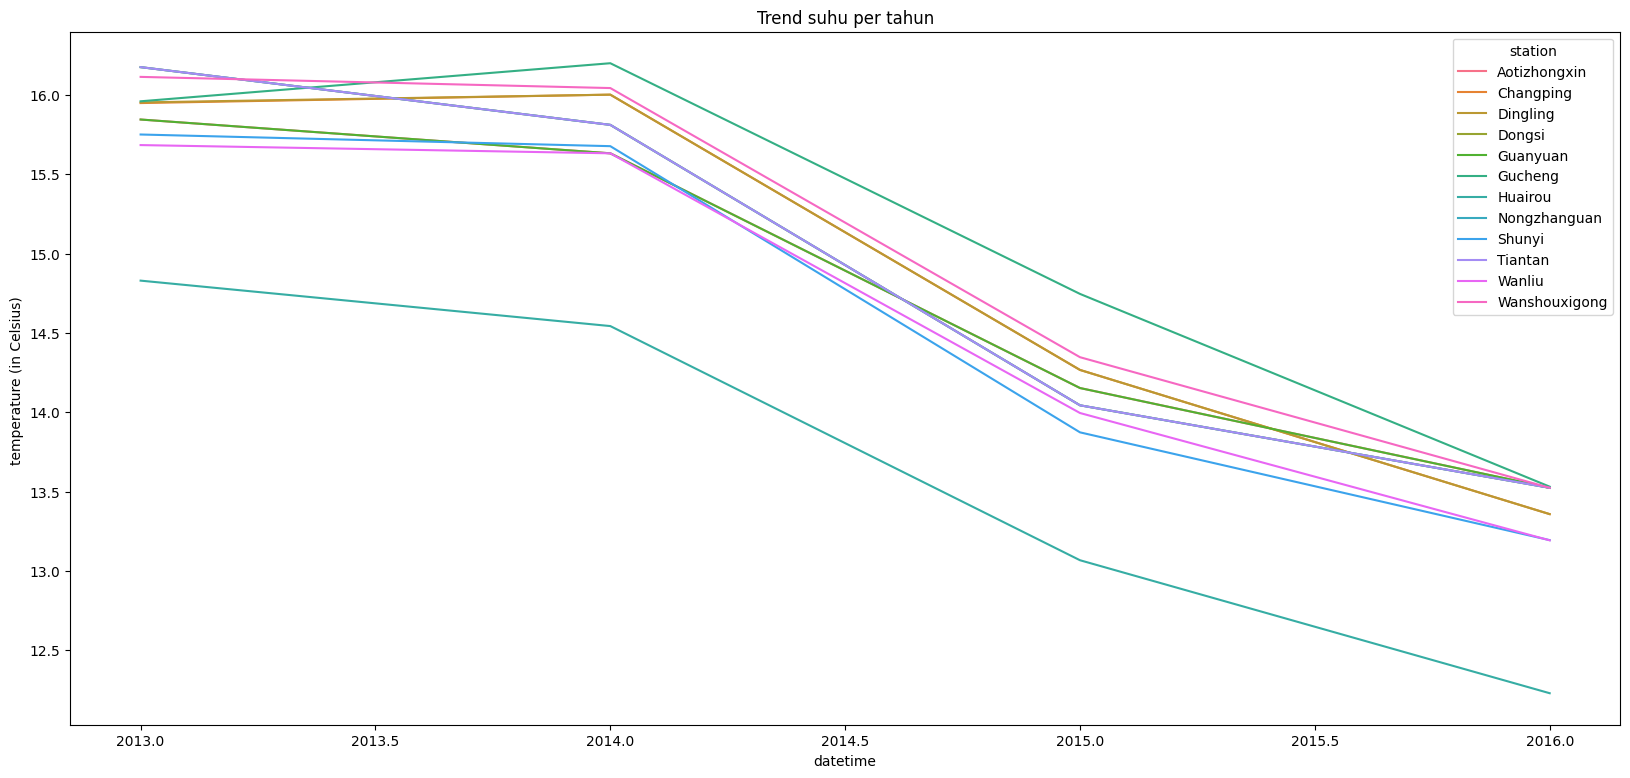

In [215]:
#draw
fig, ax = plt.subplots(figsize=(20, 9))
ax.set_ylabel("temperature (in Celsius) ")
ax.set_title("Trend suhu per tahun")
sns.lineplot(x="datetime", y='mean', hue="station",  data=b_df)

## Conclusion

### Periode kapan yang memiliki suhu paling tinggi?
> Pada tahun 2017, terjadi kelonjakan suhu udara paling tinggi dengan rata-rata kenaikan sekitar 10 derajat Celcius

### Daerah mana yang memiliki suhu paling tinggi?
> Tidak terdapat perbedaan suhu udara signifikan pada setiap daerah

### Bagaimana trend kualitas udara per tahun?
> Setiap tahunnya kualitas udara memiliki penurunan jumlah partikel PM2.5 menyebabkan kualitas udara yang terus membaik dengan penurunan jumlah partikel tertinggi berada pada periode 2014-2015.

### Daerah mana yang memiliki kualitas udara paling buruk?
> Pada tahun 2013 hingga 2017, Dongsi dan Nongzhanguan memiliki rata-rata kualitas udara yang paling buruk.

